In [ ]:
#Importing the needed libararies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
#Storing the train and test data in train and test variable through reading the csv file. >pd.read_csv

In [2]:
train = pd.read_csv(r"D:\Desktop\New folder\data_set\train.csv")
test = pd.read_csv(r"D:\Desktop\New folder\data_set\test.csv")

In [ ]:
#Getting the first 5column of the data set, pass any number in bracket head() and we will get that number of observations

In [3]:
train.head() 

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#Checking the number of  null values

In [4]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
#Combining test train together to avoid multiple works.

In [6]:
train['type']='train'
test['type']='test'
data = pd.concat([train, test],ignore_index=True)
print(train.shape, test.shape, data.shape)

(8523, 13) (5681, 12) (14204, 13)


In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [ ]:
#Checking the correlation of different variable with one another.

In [8]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [ ]:
#Using. describe we are getting the statistics of the data like count of obseravations/rows, mean, median, quartiles, min, max

In [10]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
#.Info gives us details about name of different columns, number of null values and data types

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  type                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [ ]:
#Using lambda function we are trying to get the unique values within a column

In [12]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
type                             2
dtype: int64

In [ ]:
#Getting the number of different categories within a column

In [13]:
#Filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','type']]
#Print frequency of categories
for col in categorical_columns:
    print('\nFrequency of Categories for varible %s'%col)
    print(data[col].value_counts())


Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [14]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'type'],
      dtype='object')

# DATA VISUALIZATION

<AxesSubplot:xlabel='Outlet_Type'>

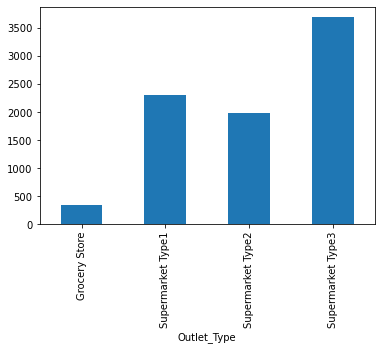

In [15]:
data.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().plot.bar()


<AxesSubplot:xlabel='Outlet_Location_Type'>

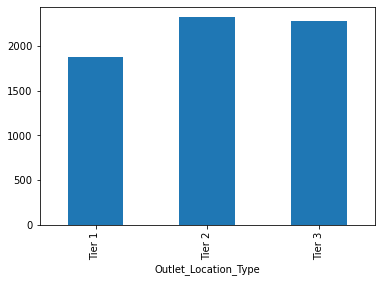

In [16]:
data.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].mean().plot.bar()


<AxesSubplot:xlabel='Outlet_Size'>

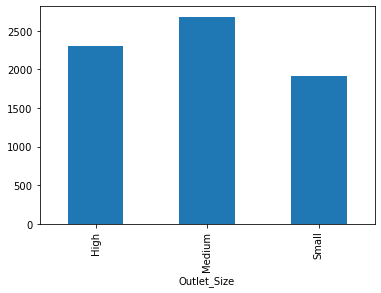

In [17]:
data.groupby('Outlet_Size')['Item_Outlet_Sales'].mean().plot.bar()


# DATA PREPROCESSING

As we have seen that we have null values in the weight variable, lets impute this

In [18]:
#Determine the average weight per item:
item_avg_weight = data.pivot_table(values='Item_Weight', columns='Item_Identifier')

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Item_Weight'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('Orignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Item_Weight'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: item_avg_weight[x] )
print('Final #missing: %d'% sum(data['Item_Weight'].isnull()))

Orignal #missing: 2439
Final #missing: 0


In [ ]:
#As we have also seen that we have null values in the outlet_size variable, lets impute this

In [19]:
#Import mode function:
from scipy.stats import mode

#Determing the mode for each
outlet_size_mode = data.pivot_table(values='Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:mode(x).mode[0]))
print('Mode for each Outlet_Type:')
print(outlet_size_mode)

#Get a boolean variable specifying missing Item_Weight values
miss_bool = data['Outlet_Size'].isnull() 

#Impute data and check #missing values before and after imputation to confirm
print('\nOrignal #missing: %d'% sum(miss_bool))
data.loc[miss_bool,'Outlet_Size'] = data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
print(sum(data['Outlet_Size'].isnull()))

Mode for each Outlet_Type:
Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  

Orignal #missing: 4016
0


In [ ]:
#Total sales with store types

In [20]:
#Check the mean sales by type:
data.pivot_table(values='Item_Outlet_Sales',index='Outlet_Type')

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [21]:

#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', columns='Item_Identifier')

#Impute 0 values with mean visibility of that product:
miss_bool = (data['Item_Visibility'] == 0)

print('Number of 0 values initially: %d'%sum(miss_bool))
data.loc[miss_bool,'Item_Visibility'] = data.loc[miss_bool,'Item_Identifier'].apply(lambda x: visibility_avg[x])
print('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


In [22]:
#Determine another variable with means ratio
data['Item_Visibility_MeanRatio'] = data.apply(lambda x: x['Item_Visibility']/visibility_avg[x['Item_Identifier']], axis=1)
print(data['Item_Visibility_MeanRatio'].describe())

count    14204.000000
mean         1.061884
std          0.235907
min          0.844563
25%          0.925131
50%          0.999070
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64


In [23]:
#Item type combine:
data['Item_Identifier'].value_counts()
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [24]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [25]:
#Change categories of low fat:
print('Actual Categories:')
print(data['Item_Fat_Content'].value_counts())

print("Updated Categories:")
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print(data['Item_Fat_Content'].value_counts())

Actual Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Updated Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [26]:
#Years:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [27]:

#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [28]:
data.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Visibility_MeanRatio,Outlet_Years,Outlet
Item_Weight,1.000000,-0.033737,-0.022028,0.035751,0.000247,-0.000512,-0.001719,0.001913,0.013261,-0.011768,-0.000247,0.003002
Item_Fat_Content,-0.033737,1.000000,0.050767,-0.004019,0.000137,-0.000138,0.001373,-0.000228,0.018719,0.004623,-0.000137,-0.001095
Item_Visibility,-0.022028,0.050767,1.000000,-0.007550,-0.084481,0.090900,-0.020753,-0.169896,-0.128453,0.281291,0.084481,-0.105471
Item_MRP,0.035751,-0.004019,-0.007550,1.000000,0.000141,-0.001052,0.000838,0.000136,0.567574,-0.006922,-0.000141,-0.000555
Outlet_Establishment_Year,0.000247,0.000137,-0.084481,0.000141,1.000000,0.425568,-0.089328,-0.122519,-0.049135,-0.244966,-1.000000,0.079047
Outlet_Size,-0.000512,-0.000138,0.090900,-0.001052,0.425568,1.000000,-0.480055,-0.401405,-0.162753,0.266532,-0.425568,0.260217
Outlet_Location_Type,-0.001719,0.001373,-0.020753,0.000838,-0.089328,-0.480055,1.000000,0.467251,0.089367,-0.054726,0.089328,-0.716151
Outlet_Type,0.001913,-0.000228,-0.169896,0.000136,-0.122519,-0.401405,0.467251,1.000000,0.401522,-0.499882,0.122519,0.099899
Item_Outlet_Sales,0.013261,0.018719,-0.128453,0.567574,-0.049135,-0.162753,0.089367,0.401522,1.000000,-0.356774,0.049135,0.162325
Item_Visibility_MeanRatio,-0.011768,0.004623,0.281291,-0.006922,-0.244966,0.266532,-0.054726,-0.499882,-0.356774,1.000000,0.244966,-0.314754


In [29]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Outlet','Item_Type_Combined'],dtype=float)

In [30]:
data.dtypes


Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
type                                  object
Item_Visibility_MeanRatio            float64
Outlet_Years                           int64
Item_Fat_Content_0                   float64
Item_Fat_Content_1                   float64
Outlet_Location_Type_0               float64
Outlet_Location_Type_1               float64
Outlet_Location_Type_2               float64
Outlet_Size_0                        float64
Outlet_Size_1                        float64
Outlet_Size_2                        float64
Outlet_Type_0                        float64
Outlet_Type_1                        float64
Outlet_Type_2                        float64
Outlet_Typ

In [ ]:
# Treating outliers with Z Score

We can see that outliers are present in the y_train data set.

Also the mean and median has much difference. Mean has been affected by outliers so we will replace the outliers with the median.


In [ ]:
data['Item_Outlet_Sales'].plot.box()

In [ ]:
#for outlet sales
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = data.mean()
    std = data.std()
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_zscore(data['Item_Outlet_Sales'])
print("Outliers from Z-scores method Item sales: ", sample_outliers)
sample_outliers = pd.Series(sample_outliers)



In [ ]:
# for sales
import numpy as np
median = (data['Item_Outlet_Sales']).median()# Replace with median
for i in range(0,len(sample_outliers)):
    #data['Sales'] = data['Item_Outlet_Sales'].apply(lambda x: median if x == i else x)
    data['Item_Outlet_Sales'] = np.where(data['Item_Outlet_Sales']==sample_outliers[i],median,data['Item_Outlet_Sales'])

In [ ]:
#for outlet sales
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = data.mean()
    std = data.std()
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code
sample_outliers2 = detect_outliers_zscore(data['Item_Visibility'])
print("Outliers from Z-scores method Item sales: ", sample_outliers2)
sample_outliers2 = pd.Series(sample_outliers)



In [ ]:
# for visibility
import numpy as np
median = (data['Item_Visibility']).median()# Replace with median
for i in range(0,len(sample_outliers2)):
    #data['Sales'] = data['Item_Outlet_Sales'].apply(lambda x: median if x == i else x)
    data['Item_Visibility'] = np.where(data['Item_Visibility']==sample_outliers2[i],median,data['Item_Visibility'])

In [ ]:
#Treating outliers with IQR

In [ ]:
#for outlet sales

def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    iqr = Q3-Q1
    # print(mean, std)
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    for i in data:
        outliers = [x for x in data if x < lower_limit  or x > upper_limit]
        return outliers
    
sample_outliers1 = detect_outliers_IQR(data['Item_Outlet_Sales'])
print("Outliers from IQR method Item sales: ", sample_outliers1)
#sample_outliers1 = pd.Series(sample_outliers1)



In [ ]:
# for sales
import numpy as np
median = (data['Item_Outlet_Sales']).median()# Replace with median
for i in range(0,len(sample_outliers1)):
    #data['Sales'] = data['Item_Outlet_Sales'].apply(lambda x: median if x == i else x)
    data['Item_Outlet_Sales'] = np.where(data['Item_Outlet_Sales']==sample_outliers1[i],median,data['Item_Outlet_Sales'])

In [ ]:
#for outlet sales

def detect_outliers_IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    iqr = Q3-Q1
    # print(mean, std)
    upper_limit = Q3 + 1.5 * iqr
    lower_limit = Q1 - 1.5 * iqr
    for i in data:
        outliers = [x for x in data if x < lower_limit  or x > upper_limit]
        return outliers
    
sample_outliers2 = detect_outliers_IQR(data['Item_Visibility'])
print("Outliers from IQR method Item sales: ", sample_outliers2)
#sample_outliers1 = pd.Series(sample_outliers1)



In [ ]:
# for sales
import numpy as np
median = (data['Item_Visibility']).median()# Replace with median
for i in range(0,len(sample_outliers2)):
    #data['Sales'] = data['Item_Outlet_Sales'].apply(lambda x: median if x == i else x)
    data['Item_Visibility'] = np.where(data['Item_Visibility']==sample_outliers2[i],median,data['Item_Visibility'])

In [ ]:
data['Item_Outlet_Sales'].plot.box()

In [ ]:
# for visibility
import numpy as np
median = (data['Item_Visibility']).median()# Replace with median
for i in range(0,len(sample_outliers2)):
    #data['Sales'] = data['Item_Outlet_Sales'].apply(lambda x: median if x == i else x)
    data['Item_Visibility'] = np.where(data['Item_Visibility']==sample_outliers2[i],median,data['Item_Visibility'])

In [ ]:
data['Item_Outlet_Sales'].describe()

<AxesSubplot:>

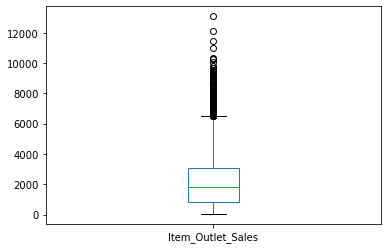

In [31]:
data['Item_Outlet_Sales'].plot.box()

data['Item_Visibility'].plot.box()

data.corr()

In [32]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['type']=="train"]
test = data.loc[data['type']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','type'],axis=1,inplace=True)
train.drop(['type'],axis=1,inplace=True)

C:\Users\Aaditya Raj\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
train.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Item_Visibility_MeanRatio            float64
Outlet_Years                           int64
Item_Fat_Content_0                   float64
Item_Fat_Content_1                   float64
Outlet_Location_Type_0               float64
Outlet_Location_Type_1               float64
Outlet_Location_Type_2               float64
Outlet_Size_0                        float64
Outlet_Size_1                        float64
Outlet_Size_2                        float64
Outlet_Type_0                        float64
Outlet_Type_1                        float64
Outlet_Type_2                        float64
Outlet_Type_3                        float64
Outlet_0                             float64
Outlet_1                             float64
Outlet_2  

# MODELING

In [34]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier','Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv("alg0.csv",index=False)

<ipython-input-34-2644ae00b0c6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base1['Item_Outlet_Sales'] = mean_sales


In [35]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn.model_selection import cross_val_score
from sklearn import metrics
def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1127
CV Score : Mean - 1129 | Std - 43.25 | Min - 1075 | Max - 1209


<ipython-input-35-7d7a622c17c1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Model Coefficients'}>

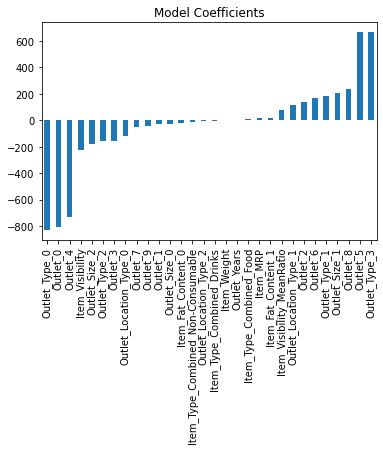

In [36]:
from sklearn.linear_model import LinearRegression, Ridge
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'alg1.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1129
CV Score : Mean - 1130 | Std - 44.6 | Min - 1076 | Max - 1217


<ipython-input-35-7d7a622c17c1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Model Coefficients'}>

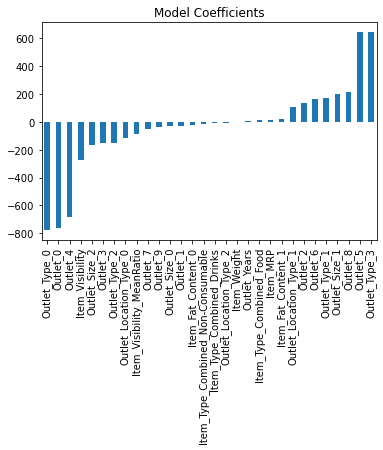

In [37]:

predictors = [x for x in train.columns if x not in [target]+IDcol]
alg2 = Ridge(alpha=0.05,normalize=True)
modelfit(alg2, train, test, predictors, target, IDcol, 'alg2.csv')
coef2 = pd.Series(alg2.coef_, predictors).sort_values()
coef2.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1057
CV Score : Mean - 1090 | Std - 45.13 | Min - 1000 | Max - 1187


<ipython-input-35-7d7a622c17c1>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest[target] = alg.predict(dtest[predictors])


<AxesSubplot:title={'center':'Feature Importances'}>

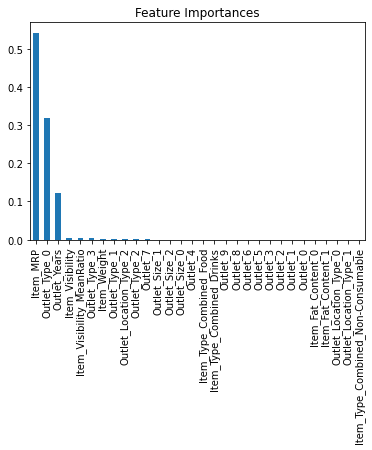

In [38]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg3 = DecisionTreeRegressor(max_depth=10, min_samples_leaf=100)
modelfit(alg3, train, test, predictors, target, IDcol, 'alg147.csv')
coef3 = pd.Series(alg3.feature_importances_, predictors).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')